<a href="https://colab.research.google.com/github/jford59/ML1/blob/main/HW2/ML2_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


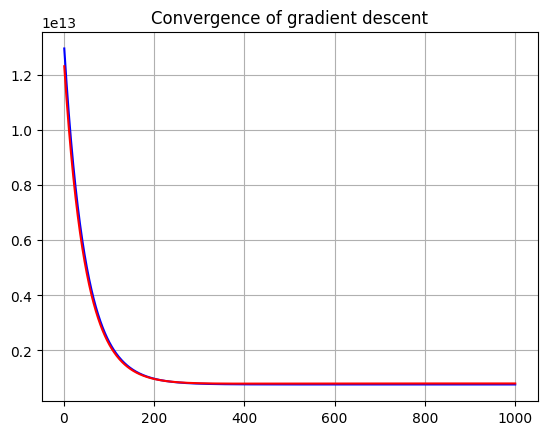

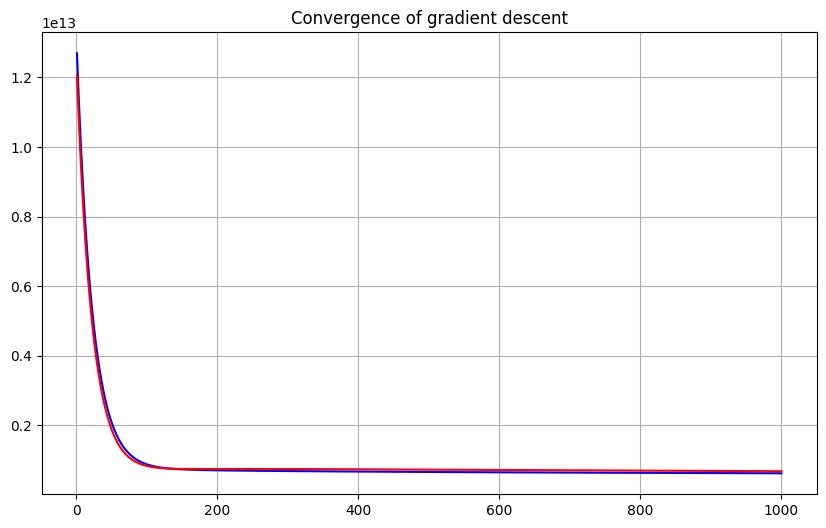

In [ ]:
# Standardize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

housing[num_vars] = scaler.fit_transform(housing[num_vars])

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

y_train = df_train.pop('price')
y_train = y_train.values
X_train = df_train[num_vars]

learning_rate = 0.01
n_iterations = 1000
m = len(X_train)

X_0 = np.ones((m, 1))
X_train = np.hstack((X_0, X_train))

y_test = df_test.pop('price')
y_test = y_test.values

X_test = df_test[num_vars]
X_0 = np.ones((len(X_test),1))
X_test = np.hstack((X_0, X_test))

theta = np.zeros(6)

train_losses = []
val_losses = []

def compute_pred(X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(X)) * np.sum(sqrErrors)
    return J

def gradient_descent(X_train, y_train, theta, learning_rate, iterations):
    m = len(y_train)  # Number of training examples
    cost_history = np.zeros(iterations)
    accuracy = np.zeros(iterations)
    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = np.subtract(predictions, y_train)
        sum_delta = (learning_rate / m) * X_train.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_pred(X_train, y_train, theta)
        accuracy[i] = compute_pred(X_test, y_test, theta)
    return theta, cost_history, accuracy

theta, cost_history, accuracy = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

plt.plot(range(1, n_iterations + 1), cost_history, color='blue')
plt.plot(range(1, n_iterations + 1), accuracy, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.title('Convergence of gradient descent')
plt.show()

theta = np.zeros(12)

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning', 'parking', 'prefarea']

X_train = df_train[num_vars]

learning_rate = 0.01
n_iterations = 1000
m = len(X_train)

X_0 = np.ones((m, 1))
X_train = np.hstack((X_0, X_train))

X_0 = np.ones((len(X_test),1))
X_test = df_test[num_vars]
X_test = np.hstack((X_0, X_test))

theta, cost_history, accuracy = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

plt.plot(range(1, n_iterations + 1), cost_history, color='blue')
plt.plot(range(1, n_iterations + 1), accuracy, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.title('Convergence of gradient descent')
plt.show()